In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf

from tensorflow import keras
from keras import layers, Sequential


dataset_path_str = "/content/drive/MyDrive/NN/Changes_Resized_200_150/Changes"
dataset_path = pathlib.Path(dataset_path_str)

In [ ]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

Found 25331 files belonging to 2 classes.
Using 20265 files for training.
Using 5066 files for validation.
['Benign', 'Malignant']


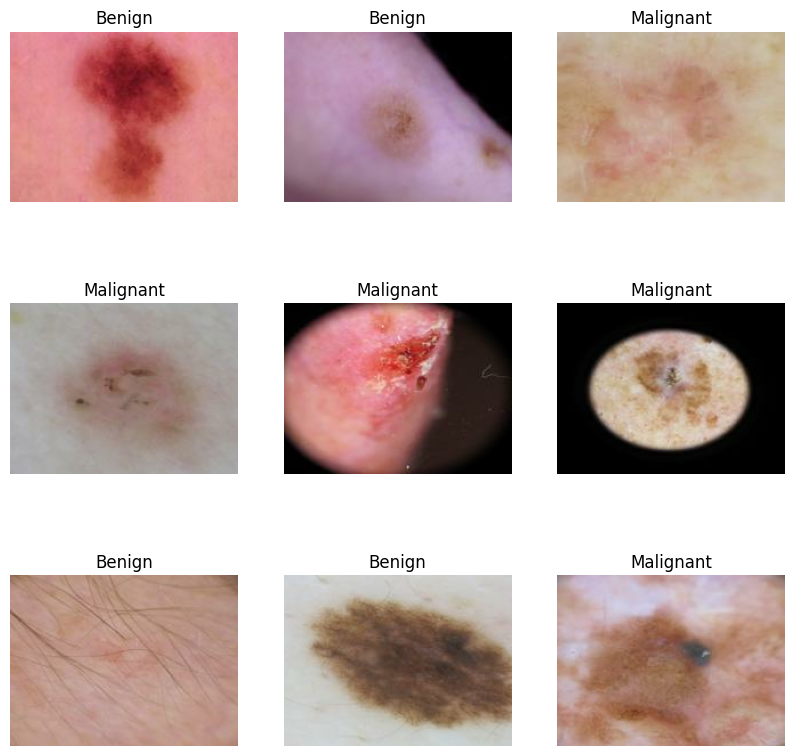

In [ ]:
seed = 297
batch_size = 32
img_height = 150
img_width = 200

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split = 0.2,
    subset = "both",
    seed = seed,
    image_size = (img_height, img_width),
    batch_size = batch_size)

class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.summary()

epochs=20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

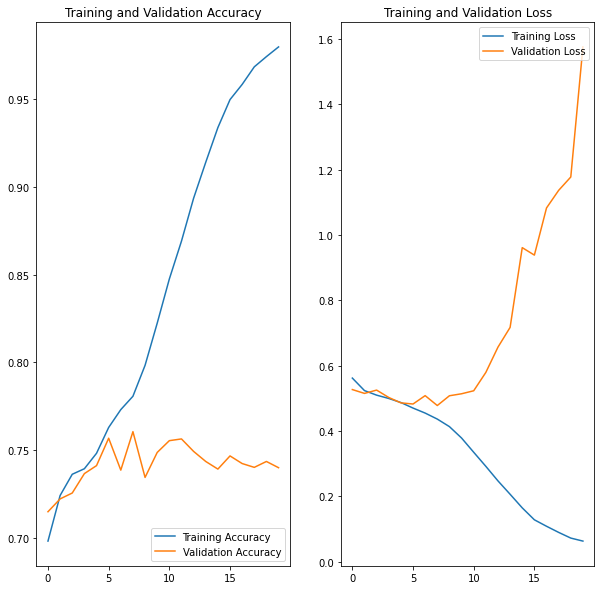

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model = Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_height,img_width, 3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.summary()

epochs=25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 150, 200, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 150, 200, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 150, 200, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 200, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 100, 16)      0         
 2D)                                                  

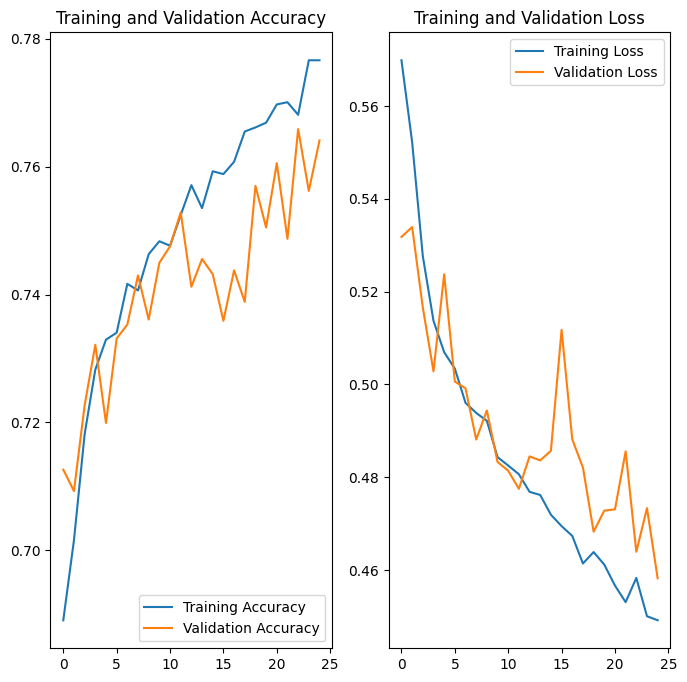

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from keras.applications.vgg19 import VGG19

vgg19_base = VGG19(input_shape = (img_height, img_width, 3),
                                  include_top = False,
                                  weights = 'imagenet')

for layer in vgg19_base.layers:
    layer.trainable = False

model = Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  layers.RandomRotation(0.5),
  layers.RandomZoom(0.1),
  layers.Rescaling(1./255),
  vgg19_base,
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(2, activation='softmax')
])

model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 0.0001),
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = ['accuracy'])

model.summary()

epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 150, 200, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 150, 200, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 150, 200, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 200, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 4, 6, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 12288)             0 

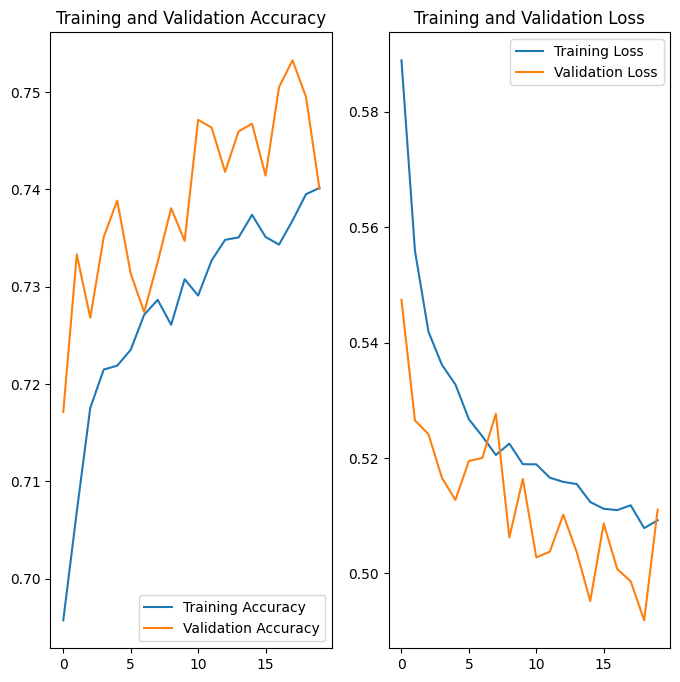

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import tensorflow
import random
import copy

class MyModel:

    img_height = 0
    img_width = 0
    features = 0
    dropout = 0.0
    learning_rate = 0.0
    mutation_rate = 0.0
    model = None
    history = None

    def __init__(self, img_height, img_width, features, dropout, learning_rate, mutation_rate, base_model = None):

        self.img_height = img_height
        self.img_width = img_width
        self.features = features
        self.dropout = dropout
        self.learning_rate = learning_rate
        self.mutation_rate = mutation_rate
        self.base_model = base_model

        if self.base_model == None:
            self.base_model = tensorflow.keras.models.Sequential([
                tensorflow.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
                tensorflow.keras.layers.MaxPooling2D(),
                tensorflow.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
                tensorflow.keras.layers.MaxPooling2D(),
                tensorflow.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
                tensorflow.keras.layers.MaxPooling2D(),
            ])

        self.model = tensorflow.keras.models.Sequential([
            tensorflow.keras.layers.RandomFlip("horizontal", input_shape=(img_height,img_width, 3)),
            tensorflow.keras.layers.RandomRotation(0.1),
            tensorflow.keras.layers.RandomZoom(0.1),
            tensorflow.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
            self.base_model,
            tensorflow.keras.layers.Dropout(dropout),
            tensorflow.keras.layers.Flatten(),
            tensorflow.keras.layers.Dense(features, activation='relu'),
            tensorflow.keras.layers.Dense(2, activation='softmax')
        ])

        self.model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = self.learning_rate),
              loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics = ['accuracy'])

    def __str__(self):
        return f"Features: {self.features}, Dropout: {self.dropout}, LR: {self.learning_rate}, MR: {self.mutation_rate}, Accuracy: {self.getAcc()}"

    def produceOffspring(self, external_mutation_rate = None):
        if (external_mutation_rate == None):
            external_mutation_rate = self.mutation_rate
        newFeature = int(self.features * (1 - external_mutation_rate/2. + random.normalvariate(0.5, 0.5/3)  * external_mutation_rate))
        newDropout = self.dropout * (1 - external_mutation_rate/2. + random.normalvariate(0.5, 0.5/3) * external_mutation_rate)
        newLR = self.learning_rate * (1 - external_mutation_rate/2. + random.normalvariate(0.5, 0.5/3) * external_mutation_rate)
        newMR = self.mutation_rate * (1 - external_mutation_rate/2. + random.normalvariate(0.5, 0.5/3) * external_mutation_rate)
        return MyModel(self.img_height, self.img_width, newFeature, newDropout, newLR, newMR, copy.deepcopy(self.base_model))

    def train(self, train_ds, val_ds, epochs):
        self.history = self.model.fit(
            train_ds,
            validation_data = val_ds,
            epochs = epochs)

    def getAcc(self):
        if self.history != None:
            return max(self.history.history['val_accuracy'])
        else:
            return None

In [ ]:
parent_model = MyModel(img_height, img_width, 128, 0.3, 0.0001, 0.1)

my_models = []
for i in range(0, 10):
    my_models.append(parent_model.produceOffspring(0.8))

for i in range(0, 10):

    print(f"========================================= {i + 1} generation =========================================")
    print("Prescreening:")

    for model in my_models:
        print(model)

    print("Starting training ...")
    for model in my_models:
        model.train(train_ds, val_ds, 10)
        print("Summar of model:")
        print(model)

    print("After screening")
    my_models = sorted(my_models, key = lambda my_model: my_model.getAcc(), reverse = True)
    for model in my_models:
        print(model)

    if i != 9:
        new_my_models = []
        print("Reproduction results")

        print("Children of most successful model that is")
        print(f"{my_models[0]} are:")
        for i in range(7):
            new_my_models.append(my_models[0].produceOffspring())
            print(f">  {new_my_models[-1]}")

        print("Children of second most successful model that is")
        print(f"{my_models[1]} are:")
        for i in range(2):
            new_my_models.append(my_models[1].produceOffspring())
            print(f">  {new_my_models[-1]}")

        print("Children of third most successful model that is")
        print(f"{my_models[2]} are:")
        for i in range(1):
            new_my_models.append(my_models[2].produceOffspring())
            print(f">  {new_my_models[-1]}")

        my_models = new_my_models

print(my_models[0])

========================================= 1 generation =========================================
Prescreening:
Features: 151, Dropout: 0.214843921945765, LR: 0.00011460725574236397, MR: 0.10289462106729722, Accuracy: None
Features: 116, Dropout: 0.3140782952796044, LR: 0.00010445792676763782, MR: 0.10829868865382673, Accuracy: None
Features: 121, Dropout: 0.287381831980311, LR: 9.99290006055096e-05, MR: 0.12549468604209105, Accuracy: None
Features: 127, Dropout: 0.28102586953259334, LR: 8.974466405280107e-05, MR: 0.10286982307359038, Accuracy: None
Features: 164, Dropout: 0.274030264917045, LR: 9.271731240426337e-05, MR: 0.07344224890400254, Accuracy: None
Features: 105, Dropout: 0.29453440869472, LR: 0.00010386524698609867, MR: 0.09280266051218096, Accuracy: None
Features: 128, Dropout: 0.3216006549021427, LR: 9.955798461824345e-05, MR: 0.10711572614533754, Accuracy: None
Features: 136, Dropout: 0.2690230321747593, LR: 7.768001788851825e-05, MR: 0.10570468118773178, Accuracy: None
Fea

In [ ]:
my_models[0].model.save("/content/drive/MyDrive/NN/Changes_resized_200_150/model_keras/model")

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/NN/Changes_resized_200_150/model_keras/model')

epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
634/634 [==============================] - 33s 30ms/step - loss: 0.4231 - accuracy: 0.7942 - val_loss: 0.4449 - val_accuracy: 0.7801
Epoch 2/30
634/634 [==============================] - 17s 26ms/step - loss: 0.4191 - accuracy: 0.7954 - val_loss: 0.4423 - val_accuracy: 0.7803
Epoch 3/30
634/634 [==============================] - 16s 26ms/step - loss: 0.4155 - accuracy: 0.7986 - val_loss: 0.4475 - val_accuracy: 0.7793
Epoch 4/30
634/634 [==============================] - 16s 26ms/step - loss: 0.4140 - accuracy: 0.7958 - val_loss: 0.4399 - val_accuracy: 0.7888
Epoch 5/30
634/634 [==============================] - 16s 25ms/step - loss: 0.4107 - accuracy: 0.8028 - val_loss: 0.4362 - val_accuracy: 0.7904
Epoch 6/30
634/634 [==============================] - 16s 26ms/step - loss: 0.4085 - accuracy: 0.8047 - val_loss: 0.4424 - val_accuracy: 0.7864
Epoch 7/30
634/634 [==============================] - 16s 26ms/step - loss: 0.4031 - accuracy: 0.8053 - val_loss: 0.4348 - val_accuracy:

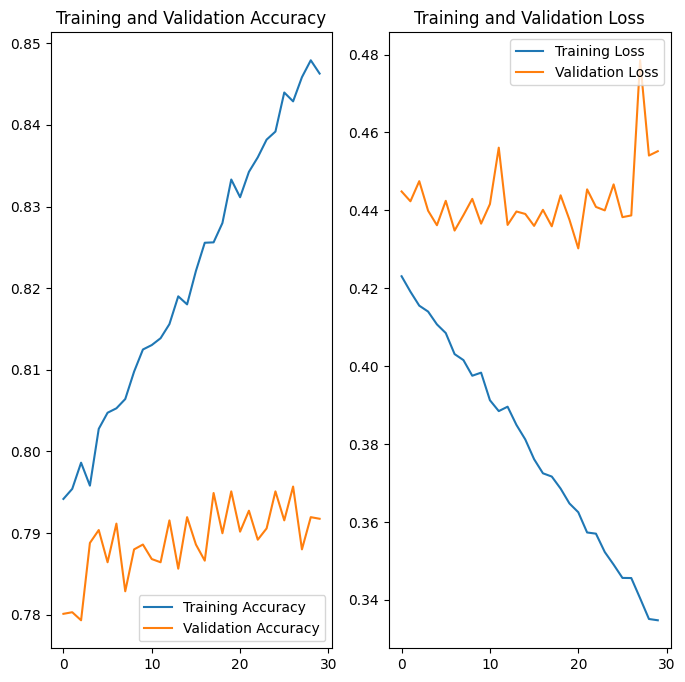

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

my_models[0].model.save("/content/drive/MyDrive/NN/Changes_resized_200_150/model_keras/model2")

In [ ]:
dataset_path_str = "/content/drive/MyDrive/NN/Changes_Resized_200_150_equal_class_cardinality"
dataset_path = pathlib.Path(dataset_path_str)

seed = 123
batch_size = 32
img_height = 150
img_width = 200

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split = 0.2,
    subset = "both",
    seed = seed,
    image_size = (img_height, img_width),
    batch_size = batch_size)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 16902 files belonging to 2 classes.
Using 13522 files for training.
Using 3380 files for validation.


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/NN/Changes_resized_200_150/model_keras/model2')

epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
423/423 [==============================] - 3183s 2s/step - loss: 0.4630 - accuracy: 0.7699 - val_loss: 0.4401 - val_accuracy: 0.7834
Epoch 2/30
423/423 [==============================] - 11s 25ms/step - loss: 0.4552 - accuracy: 0.7747 - val_loss: 0.4524 - val_accuracy: 0.7822
Epoch 3/30
423/423 [==============================] - 11s 25ms/step - loss: 0.4520 - accuracy: 0.7783 - val_loss: 0.4479 - val_accuracy: 0.7814
Epoch 4/30
423/423 [==============================] - 11s 25ms/step - loss: 0.4502 - accuracy: 0.7796 - val_loss: 0.4423 - val_accuracy: 0.7849
Epoch 5/30
423/423 [==============================] - 11s 25ms/step - loss: 0.4426 - accuracy: 0.7821 - val_loss: 0.4457 - val_accuracy: 0.7763
Epoch 6/30
423/423 [==============================] - 11s 25ms/step - loss: 0.4424 - accuracy: 0.7844 - val_loss: 0.4368 - val_accuracy: 0.7905
Epoch 7/30
423/423 [==============================] - 11s 25ms/step - loss: 0.4384 - accuracy: 0.7834 - val_loss: 0.4402 - val_accuracy:

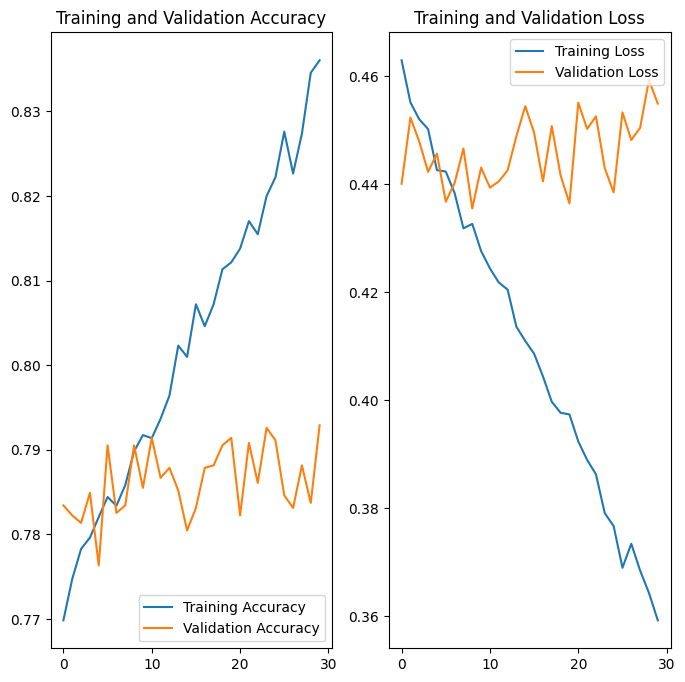

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img_height = 320
img_width = 320
epochs = 50
batch_size = 20

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/NN/Changes_Resized_320_320_Gen/train',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/NN/Changes_Resized_320_320_Gen/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

training_shape = (img_height, img_width, 3)
base_model = keras.applications.Xception(include_top = False,
                                         weights ='imagenet',
                                         input_shape = training_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(2, activation='softmax')
])

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/content/drive/MyDrive/NN/Changes_Resized_320_320_Gen/Xception_model_v1')

Found 21109 images belonging to 2 classes.
Found 4221 images belonging to 2 classes.
83683744/83683744 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                      

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf

from tensorflow import keras
from keras import layers, Sequential

In [ ]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
img_height = 320
img_width = 320
epochs = 50
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_binary/train',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_binary/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

training_shape = (img_height, img_width, 3)
base_model = keras.applications.Xception(include_top = False,
                                         weights ='imagenet',
                                         input_shape = training_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(2, activation='softmax')
])

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model1_1')

Found 21109 images belonging to 2 classes.
Found 4221 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 

INFO:tensorflow:Assets written to: /notebooks/models/assets


INFO:tensorflow:Assets written to: /notebooks/models/assets


In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_binary/train',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_binary/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

model = keras.models.load_model('/notebooks/models/model1_1')

for layer in model.layers[0].layers:
    layer.trainable = True

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.0000001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model1_2')

Found 21109 images belonging to 2 classes.
Found 4221 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 

INFO:tensorflow:Assets written to: /notebooks/models/model2/assets


INFO:tensorflow:Assets written to: /notebooks/models/model2/assets


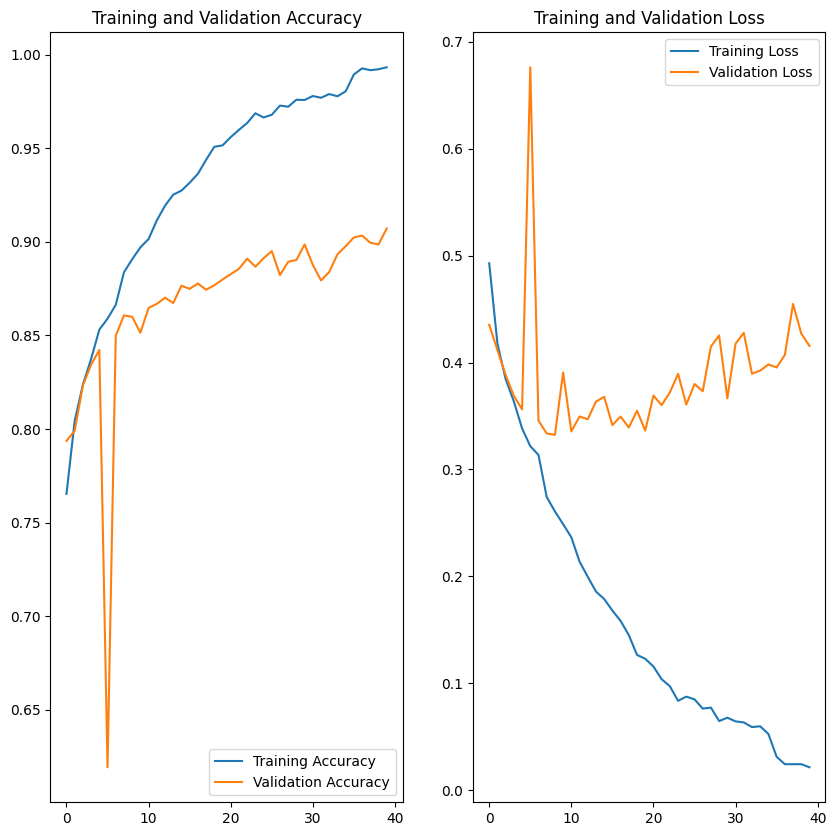

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_binary/train',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_binary/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

model = keras.models.load_model('/notebooks/models/model1_2')

for layer in model.layers[0].layers:
    layer.trainable = True

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.00005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.0000001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model1_3')

Found 21109 images belonging to 2 classes.
Found 4221 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 

INFO:tensorflow:Assets written to: /notebooks/models/model3/assets


INFO:tensorflow:Assets written to: /notebooks/models/model3/assets


In [ ]:
img_height = 320
img_width = 320
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

print('Loading imbalanced data set (representation of benign class is above twice as great as malignant):')
imbalanced_validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_binary/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        shuffle = False)

print('Loading balanced data set (both classes has equal represenation):')
balanced_validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_binary/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        shuffle = False)

model1 = keras.models.load_model('/notebooks/models/model1_1')
model2 = keras.models.load_model('/notebooks/models/model1_2')
model3 = keras.models.load_model('/notebooks/models/model1_3')
print('Loaded 3 models:')
print('> model1 - achieved about 81 % of accuracy during training')
print('> model2 - achieved about 90 % of accuracy during training')
print('> model3 - achieved about 91 % of accuracy during training')

imbalanced_labels = imbalanced_validation_generator.labels
balanced_labels = balanced_validation_generator.labels

print('Predicting model1 on imbalanced data set:')
imbalanced_predictions1 = np.argmax(np.round(model1.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model2 on imbalanced data set:')
imbalanced_predictions2 = np.argmax(np.round(model2.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model3 on imbalanced data set:')
imbalanced_predictions3 = np.argmax(np.round(model3.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model1 on balanced data set:')
balanced_predictions1 = np.argmax(np.round(model1.predict(balanced_validation_generator)), axis=1)
print('Predicting model2 on balanced data set:')
balanced_predictions2 = np.argmax(np.round(model2.predict(balanced_validation_generator)), axis=1)
print('Predicting model3 on balanced data set:')
balanced_predictions3 = np.argmax(np.round(model3.predict(balanced_validation_generator)), axis=1)

print('Evaluating model1 on imbalanced data set:')
model1.evaluate(imbalanced_validation_generator)
print('Evaluating model2 on imbalanced data set:')
model2.evaluate(imbalanced_validation_generator)
print('Evaluating model3 on imbalanced data set:')
model3.evaluate(imbalanced_validation_generator)
print('Evaluating model1 on balanced data set:')
model1.evaluate(balanced_validation_generator)
print('Evaluating model2 on balanced data set:')
model2.evaluate(balanced_validation_generator)
print('Evaluating model3 on balanced data set:')
model3.evaluate(balanced_validation_generator)

Loading imbalanced data set (representation of benign class is above twice as great as malignant):
Found 4221 images belonging to 2 classes.
Loading balanced data set (both classes has equal represenation):
Found 2816 images belonging to 2 classes.
Loaded 3 models:
> model1 - achieved about 81 % of accuracy during training
> model2 - achieved about 90 % of accuracy during training
> model3 - achieved about 91 % of accuracy during training
Predicting model1 on imbalanced data set:
132/132 [==============================] - 70s 530ms/step
Predicting model2 on imbalanced data set:
132/132 [==============================] - 72s 542ms/step
Predicting model3 on imbalanced data set:
132/132 [==============================] - 72s 540ms/step
Predicting model1 on balanced data set:
88/88 [==============================] - 47s 537ms/step
Predicting model2 on balanced data set:
88/88 [==============================] - 47s 535ms/step
Predicting model3 on balanced data set:
88/88 [==================

[0.09768049418926239, 0.9850852489471436]

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

print('Confusion matrix for model1 on imbalanced data set:')
imbalanced_matrix1 = tf.math.confusion_matrix(imbalanced_labels, imbalanced_predictions1)
print(imbalanced_matrix1.numpy())
print('Precision for model1 on imbalanced data set:')
precision.update_state(imbalanced_labels, imbalanced_predictions1)
print(precision.result().numpy())
print('Recall for model1 on imbalanced data set:')
recall.update_state(imbalanced_labels, imbalanced_predictions1)
print(recall.result().numpy())
print('F1 score for model1 on imbalanced data set:')
print((2 * recall.result().numpy() * precision.result().numpy())/(recall.result().numpy() + precision.result().numpy()))
precision.reset_state()
recall.reset_state()

print('\nConfusion matrix for model2 on imbalanced data set:')
imbalanced_matrix2 = tf.math.confusion_matrix(imbalanced_labels, imbalanced_predictions2)
print(imbalanced_matrix2.numpy())
print('Precision for model2 on imbalanced data set:')
precision.update_state(imbalanced_labels, imbalanced_predictions2)
print(precision.result().numpy())
print('Recall for model2 on imbalanced data set:')
recall.update_state(imbalanced_labels, imbalanced_predictions2)
print(recall.result().numpy())
print('F1 score for model2 on imbalanced data set:')
print((2 * recall.result().numpy() * precision.result().numpy())/(recall.result().numpy() + precision.result().numpy()))
precision.reset_state()
recall.reset_state()

print('\nConfusion matrix for model3 on imbalanced data set:')
imbalanced_matrix3 = tf.math.confusion_matrix(imbalanced_labels, imbalanced_predictions3)
print(imbalanced_matrix3.numpy())
print('Precision for model3 on imbalanced data set:')
precision.update_state(imbalanced_labels, imbalanced_predictions3)
print(precision.result().numpy())
print('Recall for model3 on imbalanced data set:')
recall.update_state(imbalanced_labels, imbalanced_predictions3)
print(recall.result().numpy())
print('F1 score for model3 on imbalanced data set:')
print((2 * recall.result().numpy() * precision.result().numpy())/(recall.result().numpy() + precision.result().numpy()))
precision.reset_state()
recall.reset_state()

print('\nConfusion matrix for model1 on balanced data set:')
balanced_matrix1 = tf.math.confusion_matrix(balanced_labels, balanced_predictions1)
print(balanced_matrix1.numpy())
print('Precision for model1 on balanced data set:')
precision.update_state(balanced_labels, balanced_predictions1)
print(precision.result().numpy())
print('Recall for model1 on balanced data set:')
recall.update_state(balanced_labels, balanced_predictions1)
print(recall.result().numpy())
print('F1 score for model1 on balanced data set:')
print((2 * recall.result().numpy() * precision.result().numpy())/(recall.result().numpy() + precision.result().numpy()))
precision.reset_state()
recall.reset_state()

print('\nConfusion matrix for model2 on balanced data set:')
balanced_matrix2 = tf.math.confusion_matrix(balanced_labels, balanced_predictions2)
print(balanced_matrix2.numpy())
print('Precision for model2 on balanced data set:')
precision.update_state(balanced_labels, balanced_predictions2)
print(precision.result().numpy())
print('Recall for model2 on balanced data set:')
recall.update_state(balanced_labels, balanced_predictions2)
print(recall.result().numpy())
print('F1 score for model2 on balanced data set:')
print((2 * recall.result().numpy() * precision.result().numpy())/(recall.result().numpy() + precision.result().numpy()))
precision.reset_state()
recall.reset_state()

print('\nConfusion matrix for model3 on balanced data set:')
balanced_matrix3 = tf.math.confusion_matrix(balanced_labels, balanced_predictions3)
print(balanced_matrix3.numpy())
print('Precision for model2 on balanced data set:')
precision.update_state(balanced_labels, balanced_predictions3)
print(precision.result().numpy())
print('Recall for model2 on balanced data set:')
recall.update_state(balanced_labels, balanced_predictions3)
print(recall.result().numpy())
print('F1 score for model2 on balanced data set:')
print((2 * recall.result().numpy() * precision.result().numpy())/(recall.result().numpy() + precision.result().numpy()))
precision.reset_state()
recall.reset_state()

Confusion matrix for model1 on imbalanced data set:
[[2496  313]
 [ 496  916]]
Precision for model1 on imbalanced data set:
0.7453214
Recall for model1 on imbalanced data set:
0.6487252
F1 score for model1 on imbalanced data set:
0.6936766639991477

Confusion matrix for model2 on imbalanced data set:
[[2637  172]
 [ 225 1187]]
Precision for model2 on imbalanced data set:
0.87343633
Recall for model2 on imbalanced data set:
0.8406516
F1 score for model2 on imbalanced data set:
0.8567303906377449

Confusion matrix for model3 on imbalanced data set:
[[2667  142]
 [ 228 1184]]
Precision for model3 on imbalanced data set:
0.892911
Recall for model3 on imbalanced data set:
0.8385269
F1 score for model3 on imbalanced data set:
0.8648648638174524

Confusion matrix for model1 on balanced data set:
[[1283  121]
 [ 411 1001]]
Precision for model1 on balanced data set:
0.89215684
Recall for model1 on balanced data set:
0.7089235
F1 score for model1 on balanced data set:
0.7900552137115294

Confusi

In [ ]:
img_height = 320
img_width = 320
epochs = 30
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

training_shape = (img_height, img_width, 3)
base_model = keras.applications.Xception(include_top = False,
                                         weights ='imagenet',
                                         input_shape = training_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(8, activation='softmax')
])

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model2_1')

Found 20265 images belonging to 8 classes.
Found 5066 images belonging to 8 classes.
83683744/83683744 [==============================] - 7s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                      

INFO:tensorflow:Assets written to: /notebooks/models/model2_1/assets


INFO:tensorflow:Assets written to: /notebooks/models/model2_1/assets


In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

model = keras.models.load_model('/notebooks/models/model2_1')

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.000001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model2_2')

Found 20265 images belonging to 8 classes.
Found 5066 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 

INFO:tensorflow:Assets written to: /notebooks/models/model2_2/assets


INFO:tensorflow:Assets written to: /notebooks/models/model2_2/assets


In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

model = keras.models.load_model('/notebooks/models/model2_2')

for layer in model.layers[0].layers:
    layer.trainable = True

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.00005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.0000001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model2_3')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 20265 images belonging to 8 classes.
Found 5066 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 

Found 20265 images belonging to 8 classes.
Found 5066 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 

INFO:tensorflow:Assets written to: /notebooks/models/model2_4/assets


INFO:tensorflow:Assets written to: /notebooks/models/model2_4/assets


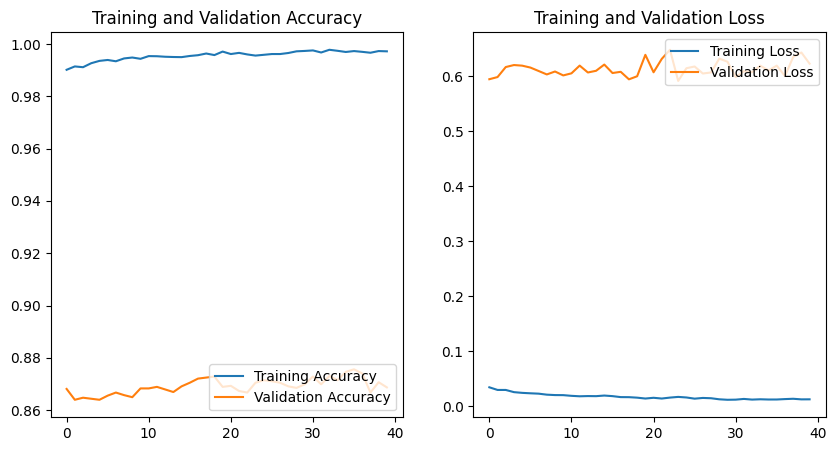

In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

model = keras.models.load_model('/notebooks/models/model2_3')

for layer in model.layers[0].layers:
    layer.trainable = True

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.0000001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model2_4')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img_height = 320
img_width = 320
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

print('Loading imbalanced data set:')
imbalanced_validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle = False)

print('Loading balanced data set:')
balanced_validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle = False)

model1 = keras.models.load_model('/notebooks/models/model2_1')
model2 = keras.models.load_model('/notebooks/models/model2_2')
model3 = keras.models.load_model('/notebooks/models/model2_3')
model4 = keras.models.load_model('/notebooks/models/model2_4')
print('Loaded 4 models:')

imbalanced_labels = imbalanced_validation_generator.labels
balanced_labels = balanced_validation_generator.labels

print('Predicting model1 on imbalanced data set:')
imbalanced_predictions1 = np.argmax(np.round(model1.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model2 on imbalanced data set:')
imbalanced_predictions2 = np.argmax(np.round(model2.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model3 on imbalanced data set:')
imbalanced_predictions3 = np.argmax(np.round(model3.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model4 on imbalanced data set:')
imbalanced_predictions4 = np.argmax(np.round(model4.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model1 on balanced data set:')
balanced_predictions1 = np.argmax(np.round(model1.predict(balanced_validation_generator)), axis=1)
print('Predicting model2 on balanced data set:')
balanced_predictions2 = np.argmax(np.round(model2.predict(balanced_validation_generator)), axis=1)
print('Predicting model3 on balanced data set:')
balanced_predictions3 = np.argmax(np.round(model3.predict(balanced_validation_generator)), axis=1)
print('Predicting model4 on balanced data set:')
balanced_predictions4 = np.argmax(np.round(model4.predict(balanced_validation_generator)), axis=1)

print('Evaluating model1 on imbalanced data set:')
model1.evaluate(imbalanced_validation_generator)
print('Evaluating model2 on imbalanced data set:')
model2.evaluate(imbalanced_validation_generator)
print('Evaluating model3 on imbalanced data set:')
model3.evaluate(imbalanced_validation_generator)
print('Evaluating model4 on imbalanced data set:')
model4.evaluate(imbalanced_validation_generator)
print('Evaluating model1 on balanced data set:')
model1.evaluate(balanced_validation_generator)
print('Evaluating model2 on balanced data set:')
model2.evaluate(balanced_validation_generator)
print('Evaluating model3 on balanced data set:')
model3.evaluate(balanced_validation_generator)
print('Evaluating model4 on balanced data set:')
model4.evaluate(balanced_validation_generator)

Loading imbalanced data set:
Found 5066 images belonging to 8 classes.
Loading balanced data set:
Found 4008 images belonging to 8 classes.
Loaded 4 models:
Predicting model1 on imbalanced data set:
159/159 [==============================] - 150s 911ms/step
Predicting model2 on imbalanced data set:
159/159 [==============================] - 134s 836ms/step
Predicting model3 on imbalanced data set:
159/159 [==============================] - 130s 814ms/step
Predicting model4 on imbalanced data set:
159/159 [==============================] - 131s 816ms/step
Predicting model1 on balanced data set:
126/126 [==============================] - 99s 783ms/step
Predicting model2 on balanced data set:
126/126 [==============================] - 102s 810ms/step
Predicting model3 on balanced data set:
126/126 [==============================] - 98s 779ms/step
Predicting model4 on balanced data set:
126/126 [==============================] - 100s 794ms/step
Evaluating model1 on imbalanced data set:
159

[1.5894299745559692, 0.7123253345489502]

Found 16008 images belonging to 8 classes.
Found 4008 images belonging to 8 classes.
83683744/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                      

INFO:tensorflow:Assets written to: /notebooks/models/model3_1/assets


INFO:tensorflow:Assets written to: /notebooks/models/model3_1/assets


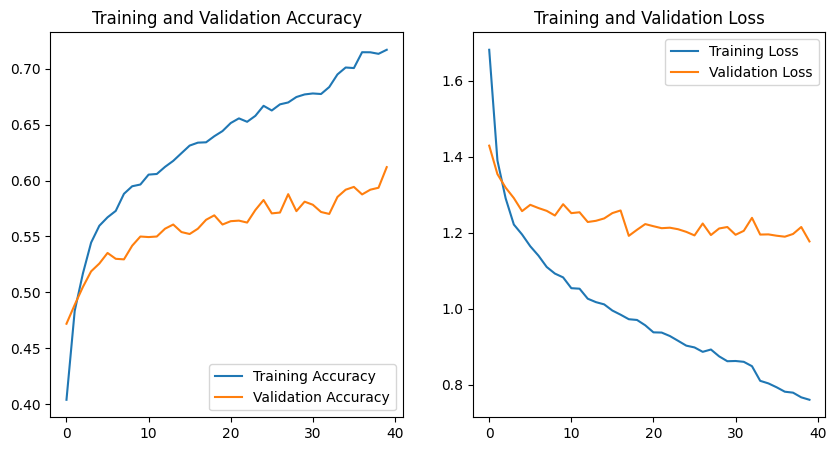

In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

training_shape = (img_height, img_width, 3)
base_model = keras.applications.Xception(include_top = False,
                                         weights ='imagenet',
                                         input_shape = training_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(8, activation='softmax')
])

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model3_1')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 16008 images belonging to 8 classes.
Found 4008 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 

INFO:tensorflow:Assets written to: /notebooks/models/model3_2/assets


INFO:tensorflow:Assets written to: /notebooks/models/model3_2/assets


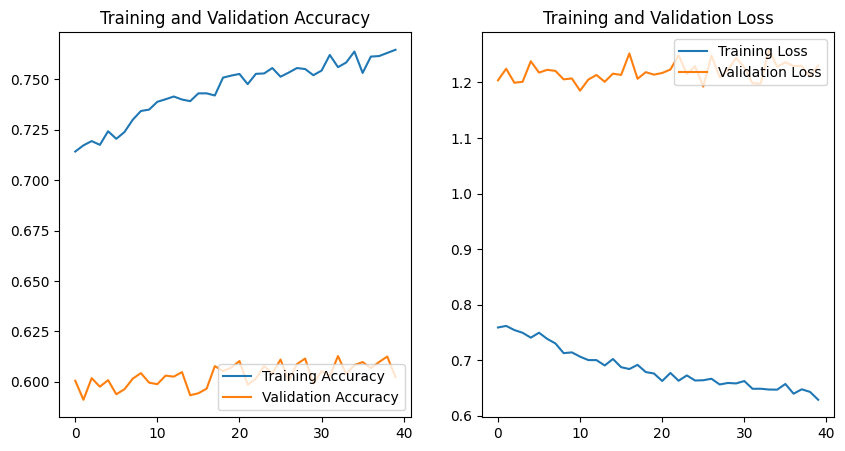

In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

model = keras.models.load_model('/notebooks/models/model3_1')

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.000001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model3_2')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 16008 images belonging to 8 classes.
Found 4008 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 

INFO:tensorflow:Assets written to: /notebooks/models/model3_3/assets


INFO:tensorflow:Assets written to: /notebooks/models/model3_3/assets


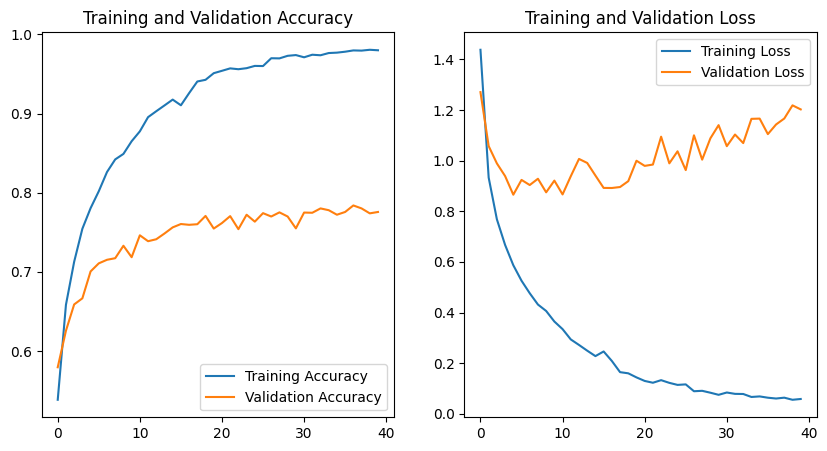

In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

model = keras.models.load_model('/notebooks/models/model3_2')

for layer in model.layers[0].layers:
    layer.trainable = True

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model3_3')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 16008 images belonging to 8 classes.
Found 4008 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 128)               26214528  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 

INFO:tensorflow:Assets written to: /notebooks/models/model3_4/assets


INFO:tensorflow:Assets written to: /notebooks/models/model3_4/assets


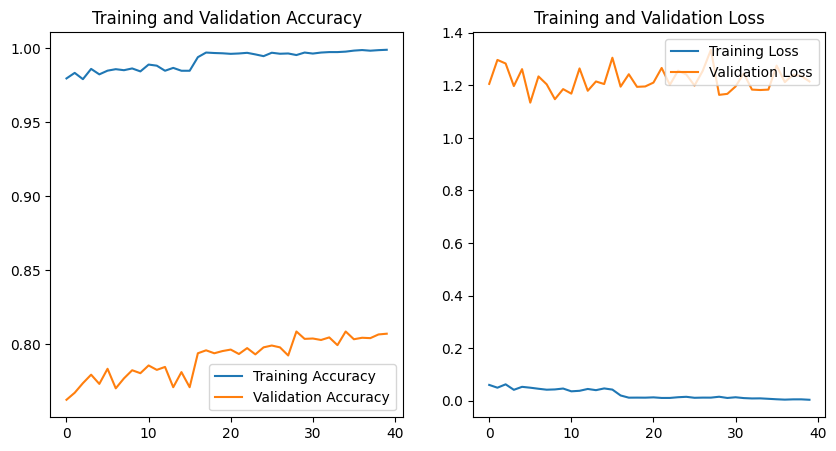

In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

model = keras.models.load_model('/notebooks/models/model3_3')

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model3_4')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img_height = 320
img_width = 320
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

print('Loading imbalanced data set:')
imbalanced_validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle = False)

print('Loading balanced data set:')
balanced_validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle = False)

model1 = keras.models.load_model('/notebooks/models/model3_1')
model2 = keras.models.load_model('/notebooks/models/model3_2')
model3 = keras.models.load_model('/notebooks/models/model3_3')
print('Loaded 4 models:')

imbalanced_labels = imbalanced_validation_generator.labels
balanced_labels = balanced_validation_generator.labels

print('Predicting model1 on imbalanced data set:')
imbalanced_predictions1 = np.argmax(np.round(model1.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model2 on imbalanced data set:')
imbalanced_predictions2 = np.argmax(np.round(model2.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model3 on imbalanced data set:')
imbalanced_predictions3 = np.argmax(np.round(model3.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model1 on balanced data set:')
balanced_predictions1 = np.argmax(np.round(model1.predict(balanced_validation_generator)), axis=1)
print('Predicting model2 on balanced data set:')
balanced_predictions2 = np.argmax(np.round(model2.predict(balanced_validation_generator)), axis=1)
print('Predicting model3 on balanced data set:')
balanced_predictions3 = np.argmax(np.round(model3.predict(balanced_validation_generator)), axis=1)

print('Evaluating model1 on imbalanced data set:')
model1.evaluate(imbalanced_validation_generator)
print('Evaluating model2 on imbalanced data set:')
model2.evaluate(imbalanced_validation_generator)
print('Evaluating model3 on imbalanced data set:')
model3.evaluate(imbalanced_validation_generator)
print('Evaluating model1 on balanced data set:')
model1.evaluate(balanced_validation_generator)
print('Evaluating model2 on balanced data set:')
model2.evaluate(balanced_validation_generator)
print('Evaluating model3 on balanced data set:')
model3.evaluate(balanced_validation_generator)

Loading imbalanced data set:
Found 5066 images belonging to 8 classes.
Loading balanced data set:
Found 4008 images belonging to 8 classes.
Loaded 4 models:
Predicting model1 on imbalanced data set:


2023-05-04 19:52:09.663723: W tensorflow/core/common_runtime/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


159/159 [==============================] - 133s 813ms/step
Predicting model2 on imbalanced data set:
159/159 [==============================] - 116s 727ms/step
Predicting model3 on imbalanced data set:
159/159 [==============================] - 117s 732ms/step
Predicting model1 on balanced data set:
126/126 [==============================] - 101s 805ms/step
Predicting model2 on balanced data set:
126/126 [==============================] - 92s 731ms/step
Predicting model3 on balanced data set:
126/126 [==============================] - 92s 727ms/step
Evaluating model1 on imbalanced data set:
159/159 [==============================] - 118s 733ms/step - loss: 1.1011 - accuracy: 0.6076
Evaluating model2 on imbalanced data set:
159/159 [==============================] - 117s 728ms/step - loss: 1.0988 - accuracy: 0.6236
Evaluating model3 on imbalanced data set:
159/159 [==============================] - 117s 727ms/step - loss: 1.2037 - accuracy: 0.7444
Evaluating model1 on balanced data set:

[1.1812806129455566, 0.7826846241950989]

Found 16008 images belonging to 8 classes.
Found 4008 images belonging to 8 classes.
83683744/83683744 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 1024)              209716224 
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                      

INFO:tensorflow:Assets written to: /notebooks/models/model4_1/assets


INFO:tensorflow:Assets written to: /notebooks/models/model4_1/assets


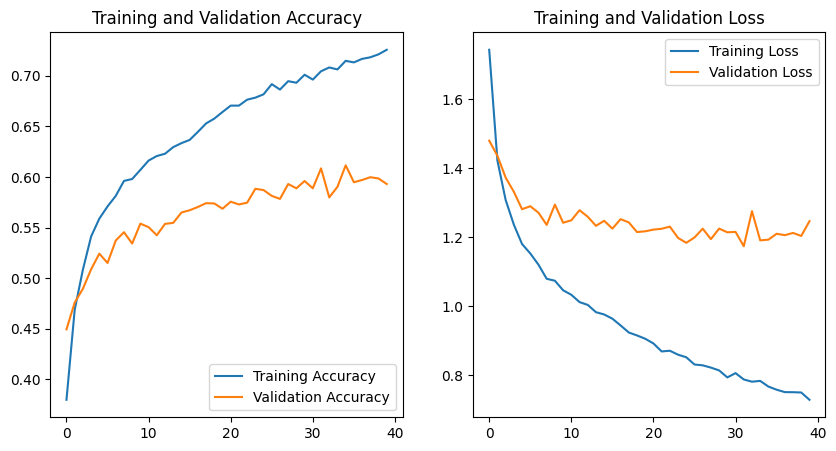

In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

training_shape = (img_height, img_width, 3)
base_model = keras.applications.Xception(include_top = False,
                                         weights ='imagenet',
                                         input_shape = training_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(8, activation='softmax')
])

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model4_1')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 16008 images belonging to 8 classes.
Found 4008 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 1024)              209716224 
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization_5 (Batc  (None, 

2023-05-10 22:29:47.885925: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-10 22:29:47.885981: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-10 22:29:48.954240: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-10 22:29:48.954306: W tensorflow/core/common_runtime/bfc_allocato

501/501 [==============================] - 421s 819ms/step - loss: 1.4047 - accuracy: 0.5465 - val_loss: 1.2941 - val_accuracy: 0.5729 - lr: 5.0000e-05
Epoch 2/40
501/501 [==============================] - 372s 742ms/step - loss: 1.0290 - accuracy: 0.6262 - val_loss: 1.1529 - val_accuracy: 0.5986 - lr: 5.0000e-05
Epoch 3/40
501/501 [==============================] - 376s 750ms/step - loss: 0.9132 - accuracy: 0.6650 - val_loss: 1.0945 - val_accuracy: 0.6203 - lr: 5.0000e-05
Epoch 4/40
501/501 [==============================] - 372s 741ms/step - loss: 0.8599 - accuracy: 0.6787 - val_loss: 1.0067 - val_accuracy: 0.6355 - lr: 5.0000e-05
Epoch 5/40
501/501 [==============================] - 372s 742ms/step - loss: 0.8157 - accuracy: 0.6982 - val_loss: 0.9925 - val_accuracy: 0.6542 - lr: 5.0000e-05
Epoch 6/40
501/501 [==============================] - 369s 735ms/step - loss: 0.7722 - accuracy: 0.7122 - val_loss: 1.1269 - val_accuracy: 0.6123 - lr: 5.0000e-05
Epoch 7/40
501/501 [=============

INFO:tensorflow:Assets written to: /notebooks/models/model4_2/assets


INFO:tensorflow:Assets written to: /notebooks/models/model4_2/assets


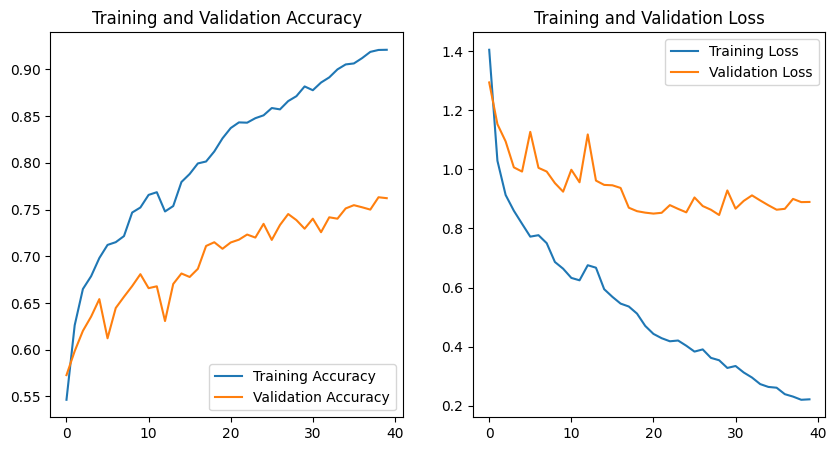

In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

model = keras.models.load_model('/notebooks/models/model4_1')

for layer in model.layers[0].layers:
    layer.trainable = True

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.00005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.000001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model4_2')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img_height = 320
img_width = 320
epochs = 40
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

train_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/train',
        target_size=(img_height, img_width),
        batch_size=batch_size)

validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size)

model = keras.models.load_model('/notebooks/models/model4_2')

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.000001)

early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_accuracy', restore_best_weights=True)

model.compile(optimizer = optimizer, loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics=["accuracy"])

model.summary()

history = model.fit(train_generator,
                    epochs = epochs,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=[learning_rate_reduction, early_stopping_monitor])

model.save('/notebooks/models/model4_3')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 16008 images belonging to 8 classes.
Found 4008 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 batch_normalization_4 (Batc  (None, 204800)           819200    
 hNormalization)                                                 
                                                                 
 dense (Dense)               (None, 1024)              209716224 
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization_5 (Batc  (None, 

2023-05-11 17:50:03.888050: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-11 17:50:03.888121: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-11 17:50:04.968211: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-11 17:50:04.968415: W tensorflow/core/common_runtime/bfc_allocato

501/501 [==============================] - 427s 831ms/step - loss: 0.2078 - accuracy: 0.9269 - val_loss: 0.9178 - val_accuracy: 0.7552 - lr: 1.0000e-05
Epoch 2/40
501/501 [==============================] - 394s 785ms/step - loss: 0.1913 - accuracy: 0.9324 - val_loss: 0.9286 - val_accuracy: 0.7560 - lr: 1.0000e-05
Epoch 3/40
501/501 [==============================] - 393s 783ms/step - loss: 0.1935 - accuracy: 0.9297 - val_loss: 0.8937 - val_accuracy: 0.7650 - lr: 1.0000e-05
Epoch 4/40
501/501 [==============================] - 396s 790ms/step - loss: 0.1821 - accuracy: 0.9363 - val_loss: 0.8883 - val_accuracy: 0.7605 - lr: 1.0000e-05
Epoch 5/40
501/501 [==============================] - 390s 778ms/step - loss: 0.1780 - accuracy: 0.9358 - val_loss: 0.8932 - val_accuracy: 0.7662 - lr: 1.0000e-05
Epoch 6/40
501/501 [==============================] - 426s 849ms/step - loss: 0.1720 - accuracy: 0.9397 - val_loss: 0.8825 - val_accuracy: 0.7712 - lr: 1.0000e-05
Epoch 7/40
501/501 [=============

In [ ]:
img_height = 320
img_width = 320
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

print('Loading imbalanced data set:')
imbalanced_validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle = False)

print('Loading balanced data set:')
balanced_validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle = False)

model1 = keras.models.load_model('/notebooks/models/model4_1')
model2 = keras.models.load_model('/notebooks/models/model4_2')
model3 = keras.models.load_model('/notebooks/models/model4_3')
print('Loaded 4 models:')

imbalanced_labels = imbalanced_validation_generator.labels
balanced_labels = balanced_validation_generator.labels

print('Predicting model1 on imbalanced data set:')
imbalanced_predictions1 = np.argmax(np.round(model1.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model2 on imbalanced data set:')
imbalanced_predictions2 = np.argmax(np.round(model2.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model3 on imbalanced data set:')
imbalanced_predictions3 = np.argmax(np.round(model3.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model1 on balanced data set:')
balanced_predictions1 = np.argmax(np.round(model1.predict(balanced_validation_generator)), axis=1)
print('Predicting model2 on balanced data set:')
balanced_predictions2 = np.argmax(np.round(model2.predict(balanced_validation_generator)), axis=1)
print('Predicting model3 on balanced data set:')
balanced_predictions3 = np.argmax(np.round(model3.predict(balanced_validation_generator)), axis=1)

print('Evaluating model1 on imbalanced data set:')
model1.evaluate(imbalanced_validation_generator)
print('Evaluating model2 on imbalanced data set:')
model2.evaluate(imbalanced_validation_generator)
print('Evaluating model3 on imbalanced data set:')
model3.evaluate(imbalanced_validation_generator)
print('Evaluating model1 on balanced data set:')
model1.evaluate(balanced_validation_generator)
print('Evaluating model2 on balanced data set:')
model2.evaluate(balanced_validation_generator)
print('Evaluating model3 on balanced data set:')
model3.evaluate(balanced_validation_generator)

Loading imbalanced data set:
Found 5066 images belonging to 8 classes.
Loading balanced data set:
Found 4008 images belonging to 8 classes.
Loaded 4 models:
Predicting model1 on imbalanced data set:
  1/159 [..............................] - ETA: 17:03

2023-05-12 07:10:45.182178: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-12 07:10:45.182276: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


159/159 [==============================] - 127s 761ms/step


2023-05-12 07:12:45.511008: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.42GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-12 07:12:45.511092: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.42GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


Predicting model2 on imbalanced data set:
159/159 [==============================] - 112s 697ms/step
Predicting model3 on imbalanced data set:
159/159 [==============================] - 110s 685ms/step
Predicting model1 on balanced data set:
126/126 [==============================] - 98s 780ms/step


2023-05-12 07:18:07.363367: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-12 07:18:07.363438: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


Predicting model2 on balanced data set:
126/126 [==============================] - 86s 683ms/step
Predicting model3 on balanced data set:
126/126 [==============================] - 87s 693ms/step
Evaluating model1 on imbalanced data set:
159/159 [==============================] - 112s 698ms/step - loss: 1.0747 - accuracy: 0.6281
Evaluating model2 on imbalanced data set:
159/159 [==============================] - 110s 688ms/step - loss: 0.8975 - accuracy: 0.7317
Evaluating model3 on imbalanced data set:
159/159 [==============================] - 112s 696ms/step - loss: 0.8867 - accuracy: 0.7499
Evaluating model1 on balanced data set:
126/126 [==============================] - 89s 705ms/step - loss: 1.2479 - accuracy: 0.5913
Evaluating model2 on balanced data set:
126/126 [==============================] - 87s 687ms/step - loss: 0.9124 - accuracy: 0.7550
Evaluating model3 on balanced data set:
126/126 [==============================] - 87s 692ms/step - loss: 0.9255 - accuracy: 0.7740


[0.9255489110946655, 0.773952066898346]

In [ ]:
import matplotlib.cm as cm
import matplotlib.image as mpimg

def get_img_array(img_path, size):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.Model(
        [model.input], [model.layers[0].get_output_at(0), model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path, ax, alpha=0.4):
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)

    img = mpimg.imread(cam_path)
    imgplot = ax.imshow(img)

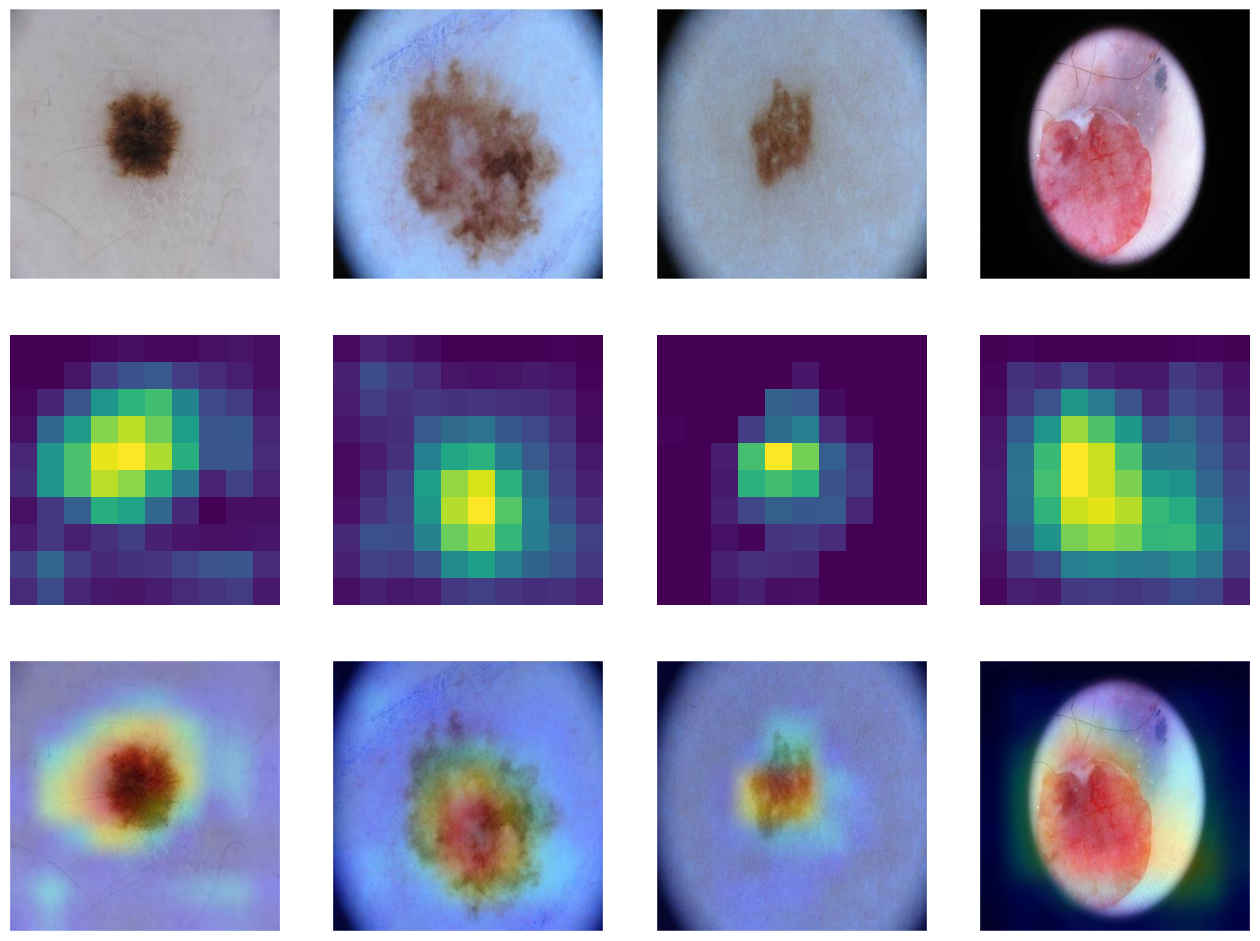

In [ ]:
import os
img_size = (320, 320)
preprocess_input = keras.applications.xception.preprocess_input
last_conv_layer_name = "block14_sepconv2_act"

model = keras.models.load_model('/notebooks/models/model1_3')
model.layers[-1].activation = None

img_paths = ['320_320_eq_binary/train/Benign/ISIC_0000001.jpg',
             '320_320_eq_binary/train/Malignant/ISIC_0000002.jpg',
             '320_320_eq_binary/train/Benign/ISIC_0000006.jpg',
            '320_320_eq_binary/train/Malignant/ISIC_0000004.jpg']

fig, axs = plt.subplots(3, len(img_paths), figsize=(16, 12))

for i in range(len(img_paths)):
    img_name = img_paths[i].split('/')[-1].split('.')[0]
    img = mpimg.imread(img_paths[i])
    imgplot = axs[0, i].imshow(img)
    img_array = preprocess_input(get_img_array(img_paths[i], size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    axs[1, i].matshow(heatmap)
    save_and_display_gradcam(img_paths[i], heatmap, 'visualization/' + img_name + '_visu.jpg', axs[2, i])
    axs[0, i].axis('off')
    axs[1, i].axis('off')
    axs[2, i].axis('off')

plt.show()

In [ ]:
img_height = 320
img_width = 320
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10,
        rescale=1./255)

print('Loading imbalanced data set:')
imbalanced_validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle = False)

print('Loading balanced data set:')
balanced_validation_generator = datagen.flow_from_directory(
        '/notebooks/320_320_eq_mult/val',
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle = False)

model1 = keras.models.load_model('/notebooks/models/model4_1')
model2 = keras.models.load_model('/notebooks/models/model4_2')
model3 = keras.models.load_model('/notebooks/models/model4_3')
print('Loaded 4 models:')

imbalanced_labels = imbalanced_validation_generator.labels
balanced_labels = balanced_validation_generator.labels

print('Predicting model1 on imbalanced data set:')
imbalanced_predictions1 = np.argmax(np.round(model1.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model2 on imbalanced data set:')
imbalanced_predictions2 = np.argmax(np.round(model2.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model3 on imbalanced data set:')
imbalanced_predictions3 = np.argmax(np.round(model3.predict(imbalanced_validation_generator)), axis=1)
print('Predicting model1 on balanced data set:')
balanced_predictions1 = np.argmax(np.round(model1.predict(balanced_validation_generator)), axis=1)
print('Predicting model2 on balanced data set:')
balanced_predictions2 = np.argmax(np.round(model2.predict(balanced_validation_generator)), axis=1)
print('Predicting model3 on balanced data set:')
balanced_predictions3 = np.argmax(np.round(model3.predict(balanced_validation_generator)), axis=1)

print('Evaluating model1 on imbalanced data set:')
model1.evaluate(imbalanced_validation_generator)
print('Evaluating model2 on imbalanced data set:')
model2.evaluate(imbalanced_validation_generator)
print('Evaluating model3 on imbalanced data set:')
model3.evaluate(imbalanced_validation_generator)
print('Evaluating model1 on balanced data set:')
model1.evaluate(balanced_validation_generator)
print('Evaluating model2 on balanced data set:')
model2.evaluate(balanced_validation_generator)
print('Evaluating model3 on balanced data set:')
model3.evaluate(balanced_validation_generator)

Loading imbalanced data set:
Found 5066 images belonging to 8 classes.
Loading balanced data set:
Found 4008 images belonging to 8 classes.
Loaded 4 models:
Predicting model1 on imbalanced data set:
159/159 [==============================] - 119s 743ms/step
Predicting model2 on imbalanced data set:
159/159 [==============================] - 85s 534ms/step
Predicting model3 on imbalanced data set:
126/126 [==============================] - 68s 539ms/step
Predicting model3 on balanced data set:
126/126 [==============================] - 65s 515ms/step
Evaluating model1 on imbalanced data set:
159/159 [==============================] - 84s 524ms/step - loss: 1.0830 - accuracy: 0.6259
Evaluating model2 on imbalanced data set:
159/159 [==============================] - 83s 520ms/step - loss: 0.8918 - accuracy: 0.7298
Evaluating model3 on imbalanced data set:
159/159 [==============================] - 81s 504ms/step - loss: 0.9068 - accuracy: 0.7507
Evaluating model1 on balanced data set:
12

[0.9548221826553345, 0.7689620852470398]

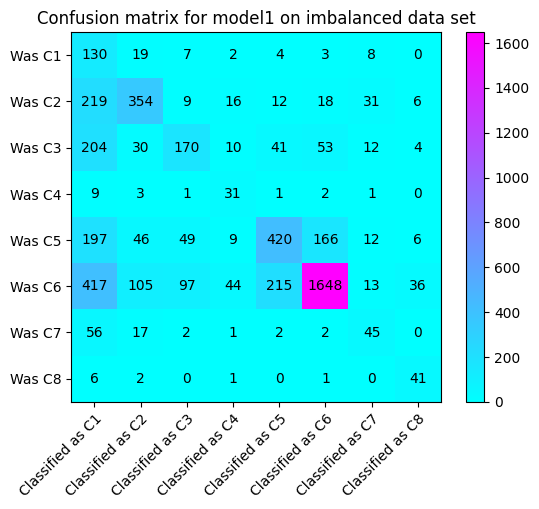

[0.75144509 0.53233083 0.32442748 0.64583333 0.4640884  0.64
 0.36       0.80392157]


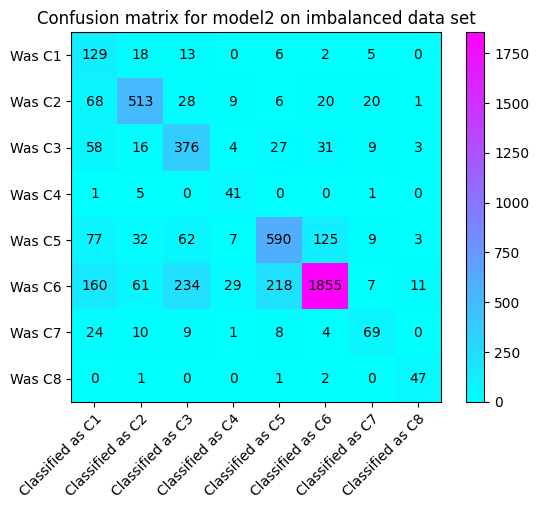

[0.74566474 0.77142857 0.71755725 0.85416667 0.6519337  0.72038835
 0.552      0.92156863]


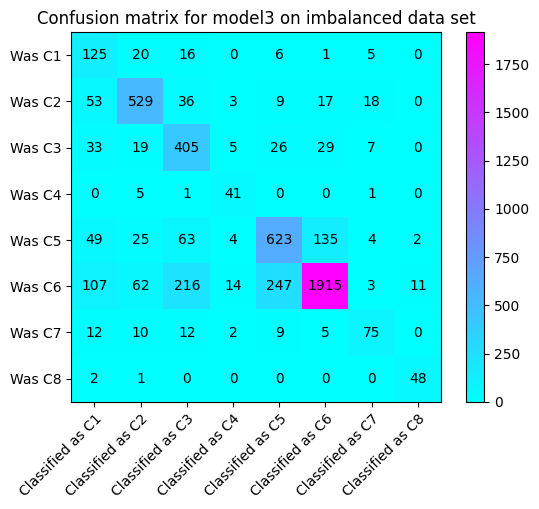

[0.72254335 0.79548872 0.77290076 0.85416667 0.68839779 0.74368932
 0.6        0.94117647]


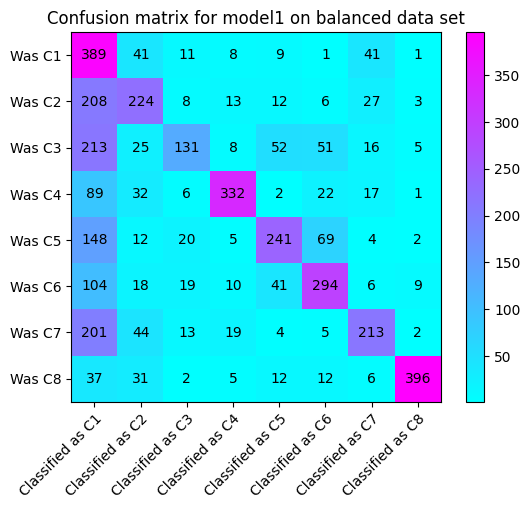

[0.77644711 0.44710579 0.26147705 0.66267465 0.48103792 0.58682635
 0.4251497  0.79041916]


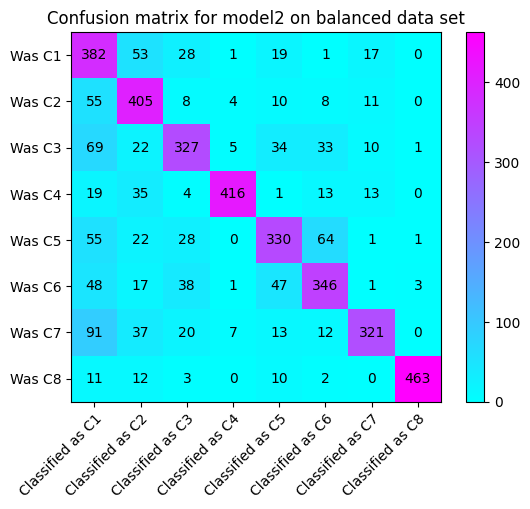

[0.76247505 0.80838323 0.65269461 0.83033932 0.65868263 0.69061876
 0.64071856 0.9241517 ]


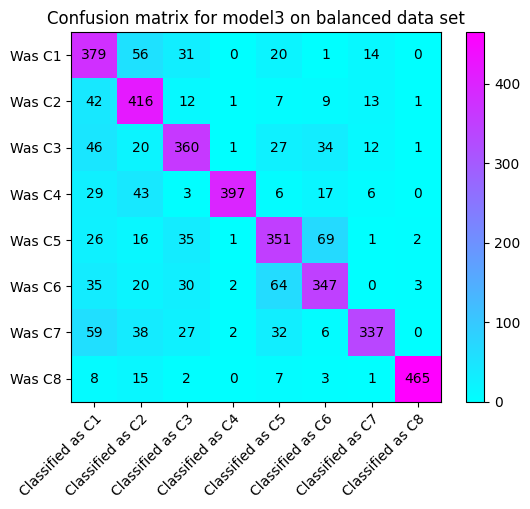

[0.75648703 0.83033932 0.71856287 0.79241517 0.7005988  0.69261477
 0.67265469 0.92814371]


In [ ]:
import matplotlib as mpl

def confusion_matrix_as_hp(data, x_labels, y_lables, title):
    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap="cool")
    plt.colorbar(im, ax=ax)
    ax.set_xticks(np.arange(len(x_labels)), labels=x_labels)
    ax.set_yticks(np.arange(len(y_lables)), labels=y_lables)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    for i in range(len(y_lables)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, data[i, j],
                           ha="center", va="center", color="black")
    ax.set_title(title)

def class_precisions_from_confusion_matrix(data):
    one_class_cardinality = np.sum(data, axis=1)
    precisions = np.empty(len(data))
    for i in range(len(data)):
        precisions[i] = data[i, i] / one_class_cardinality[i]
    return precisions

true_label = ["Was C1", "Was C2", "Was C3", "Was C4",
              "Was C5", "Was C6", "Was C7", "Was C8"]
predicted_label = ["Classified as C1", "Classified as C2", "Classified as C3", "Classified as C4",
                   "Classified as C5", "Classified as C6", "Classified as C7", "Classified as C8"]

imbalanced_matrix1 = tf.math.confusion_matrix(imbalanced_labels, imbalanced_predictions1)
confusion_matrix_as_hp(imbalanced_matrix1.numpy(),
                       predicted_label,
                       true_label,
                       "Confusion matrix for model1 on imbalanced data set")
plt.show()
print(class_precisions_from_confusion_matrix(imbalanced_matrix1.numpy()))

imbalanced_matrix2 = tf.math.confusion_matrix(imbalanced_labels, imbalanced_predictions2)
confusion_matrix_as_hp(imbalanced_matrix2.numpy(),
                       predicted_label,
                       true_label,
                       "Confusion matrix for model2 on imbalanced data set")
plt.show()
print(class_precisions_from_confusion_matrix(imbalanced_matrix2.numpy()))

imbalanced_matrix3 = tf.math.confusion_matrix(imbalanced_labels, imbalanced_predictions3)
confusion_matrix_as_hp(imbalanced_matrix3.numpy(),
                       predicted_label,
                       true_label,
                       "Confusion matrix for model3 on imbalanced data set")
plt.show()
print(class_precisions_from_confusion_matrix(imbalanced_matrix3.numpy()))

balanced_matrix1 = tf.math.confusion_matrix(balanced_labels, balanced_predictions1)
confusion_matrix_as_hp(balanced_matrix1.numpy(),
                       predicted_label,
                       true_label,
                       "Confusion matrix for model1 on balanced data set")
plt.show()
print(class_precisions_from_confusion_matrix(balanced_matrix1.numpy()))

balanced_matrix2 = tf.math.confusion_matrix(balanced_labels, balanced_predictions2)
confusion_matrix_as_hp(balanced_matrix2.numpy(),
                       predicted_label,
                       true_label,
                       "Confusion matrix for model2 on balanced data set")
plt.show()
print(class_precisions_from_confusion_matrix(balanced_matrix2.numpy()))

balanced_matrix3 = tf.math.confusion_matrix(balanced_labels, balanced_predictions3)
confusion_matrix_as_hp(balanced_matrix3.numpy(),
                       predicted_label,
                       true_label,
                       "Confusion matrix for model3 on balanced data set")
plt.show()
print(class_precisions_from_confusion_matrix(balanced_matrix3.numpy()))